In [1]:
import numpy as np
data = np.array([8,  4,  7, 11,  9,  7,  5,  9,  8,  7])

In [2]:
from scipy.stats import binom, fit

In [4]:
bounds = [(20,20),(0,1)]
fit(binom, data, bounds)

  params: FitParams(n=np.float64(20.0), p=np.float64(0.37500000326768074), loc=np.float64(0.0))
 success: True
 message: 'Optimization terminated successfully.'

In [5]:
res = fit(binom, data, bounds)
res.params

FitParams(n=np.float64(20.0), p=np.float64(0.37499999784511173), loc=np.float64(0.0))

In [6]:
res.params[1]

np.float64(0.37499999784511173)

In [13]:
from scipy.stats import bernoulli
p = 0.4
bernoulli.rvs(p, size = 5, random_state = 10)

array([1, 0, 1, 1, 0])

## Task 1.1
Generate n = 100 values of a Bernoulli random variable X with P(X = 1) = 0.3, using
random_state = 100 , and assign the resulting Numpy-array to the variable data_ber .

In [32]:
from scipy.stats import bernoulli

p = 0.3
data_ber = bernoulli.rvs(p, size=100, random_state=100)
data_ber.sum()

np.int64(25)

## Task 1.2
Find the maximum likelihood estimate for p = P(X = 1), using fit function for the data
data_ber (stress that bernoulli has only one parameter, denoted below by p, hence, bounds should contain only one tuple for the range of p € [0, 1]). Assign the result to res_ber.

Check the output:

FitParams (p=0.24999999423017177, loc=0.0)

As we can see, the answer is pretty close to the real maximum likelihood estimate (known from lectures), which h, where k is the number of 1-s and n is the total number of trials: the absolution value of the difference:

np.abs(data_ber.sumt)/n-res_ber.paramsl01)

5.76982822630967e-09

On the other hand, the maximum likelihood estimator does not recover the real probability
p = 0.3 with which the data data_ber was generated. This because the sample size is
relatively small.

In [28]:
res_ber = fit(bernoulli, data_ber)
res_ber

  params: FitParams(p=np.float64(0.2499999978228714), loc=np.float64(0.0))
 success: True
 message: 'Optimization terminated successfully.'

In [43]:
np.abs(data_ber.sum() / (100- res_ber.params[0]))

np.float64(0.25062656641056996)

## Task 1.3
Repeat the previous steps but generate now a sample of the size n = 100000. Assign the output of
fit function to res_big_ber.

In [48]:
from scipy.stats import bernoulli

data_ber2 = bernoulli.rvs(p = 0.3, size=100000, random_state=100)
data_ber2.sum()

res_big_ber = fit(bernoulli, data_ber2)
res_big_ber.params[0]



np.float64(0.29987999567997364)

## Maximum likelihood estimation of several parameters at once
Let's now return back to the dataset data. Suppose now that we know only that it follows the binomial distribution: X ~ Bin(n, p), where n is not know exactly, but we expect that 1 ≤ n ≤ 25.
We can then modify the bounds for n:

In [50]:
from scipy.stats import binom

bounds = [(1,25), (0,1)]
res = fit(binom, data, bounds)
res

  params: FitParams(n=np.float64(14.0), p=np.float64(0.5357142738177754), loc=np.float64(0.0))
 success: True
 message: 'Optimization terminated successfully.'

Thus, the highest probability to see the sample data, for the given restriction on n, would be if
X ~ Bin(14, ~ 0.5357).

Moreover, the output of fit function (which we denoted res) can be plotted:

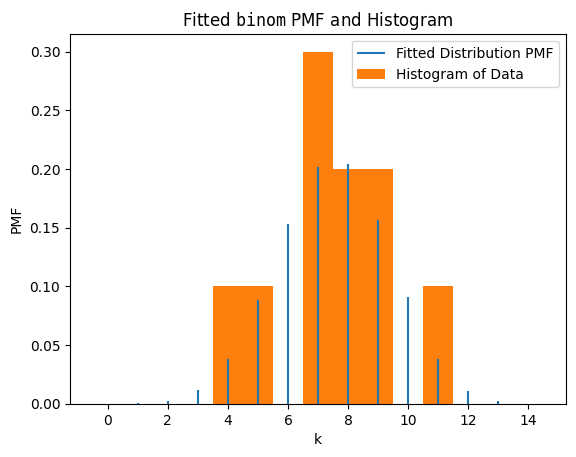

In [52]:
import matplotlib.pyplot as plt
res.plot()
plt.show()

Remark. Similarly, to the tasks above, the data here was initially generated by very different parameters: X ~ Bin(18,0.435). However, the fitting for so small sample can't reconstruct this. The sample is random, and it appeared that among all Bin(n, p) the distribution X ~ Bin(14, ~ 0.5357) is the closest (the most typical) for such sample.


## Task 1.4
Generate n = 10 random values of the normal distribution of X~ N(10, 1.52) (see Lab 5

(solutions): Task 3.4 for rvs function and e.g. Task 3.3 for using loc argument for the mean and

scale for the standard deviation; don't forget to import norm). Use random_state = 123.

Assign the output to data_norm.

As you can see, the sample is not large enough to “catch” the original mean, though, it’s relatively close.



In [67]:
from scipy.stats import norm

n = 10
data_norm = norm.rvs(loc = 10, size = 10, scale = 1.5, random_state=123)
print(data_norm.mean(), data_norm.std())



9.595725834510507 1.8544572022485342


## Task 1.5
Fit the data to a normal distribution: find the normal distribution
N (4, 02) with u € [7, 12] and o € [1, 2] which is most likely to be the distribution for the sample data_norm. Assign the result to res_norm.

In [87]:
bounds = [(7,12),(1,2)]
res_norm = fit(norm, data_norm, bounds)
res_norm.params[0]

np.float64(9.595725734686653)

In [88]:
norm.fit(data_norm)

(np.float64(9.595725834510507), np.float64(1.8544572022485342))

## 2. How we can calculate maximun likelihood estimator manually
Let's return again to data sample:

In [89]:
data

array([ 8,  4,  7, 11,  9,  7,  5,  9,  8,  7])

Suppose we know that it came from X~ Bin(20, p), and we want to estimate p manually, without using fit function. How does fit do the estimation? Look at the formulas at the beginning of this Lab.

We can calculate the likelihood function C(0) for each particular value of 0 = p. E.g. for
p = 0.4, we can calculate px (x) = P(X =x) for each x from data.

In [90]:
n = 20
p = 0.4
probabilities = binom.pmf(data, n = n, p = p)
probabilities

array([0.17970579, 0.03499079, 0.16588227, 0.07099488, 0.15973848,
       0.16588227, 0.07464702, 0.15973848, 0.17970579, 0.16588227])

In [91]:
likelihood = np.prod(probabilities)
likelihood

np.float64(6.974873531555755e-10)

As you can see, the value is pretty small (as it is a product of probabilities which are always less than 1). It may later lead  to errors, so it is highly recommended to work with log-likelihood instead: we first apply np. log function to all entries in probabilities.
Note that log in Numpy stands for In (the natural logarithm).

## Task 2.1
Assign to logprobabilities the array of natural logarithms of all entries in probabilities. Assign to loglikelihood the sum of all these logarithms.

In [93]:
logprobabilities = np.log(probabilities)
loglikelihood = logprobabilities.sum()
loglikelihood

np.float64(-21.083536734074002)

Remark. Note that the distributions in scipy. stats contains functions logpmf and logpdf for calculation logarithms of PMF (for discrete random variables) and PDF (for continuous random variables), respectively. We could write also:

In [94]:
logprobabilities = binom.logpmf(data, n=n, p=p)
loglikelihood = logprobabilities.sum()
loglikelihood

np.float64(-21.083536734074023)


Now, we are going to calculate the log-likelihood for a range of p € [0, 1]. We, hence, define a function which combines all previous steps. Let's call eg. loglbinom, it will have only one argument: the value of p; we keep the value of n and data fixed. We can do this in one line

In [100]:
loglbinom(0.4)

def loglbinom(p):
    return binom.logpmf(data, n=n, p=p).sum()

-21.083536734074023


In [104]:
def loglbinom1(p):
    probabilities = binom.pmf(data, n=n, p=p)
    logprobabilities = np.log(probabilities)
    loglikelihood = logprobabilities.sum()
    return loglikelihood

In [107]:
print(loglbinom(0.4),  loglbinom1(0.4))

-21.083536734074023 -21.083536734074002


We are going to apply loglbinom to an array of values of p. For this, we create its vectorised version:

In [108]:
vlogbinom = np.vectorize(loglbinom)

In [112]:
vlogbinom(0.4)

array(-21.08353673)

## Task 2.2
Define array x of 1000 points from [0, 1], using np. linspace function (see e.g. Lab 4 or Lab 5). Apply the vectorised function vloglbinom to x (it keeps n=20 and data fixed), and assign the result to y. Plot the graph of y against x.

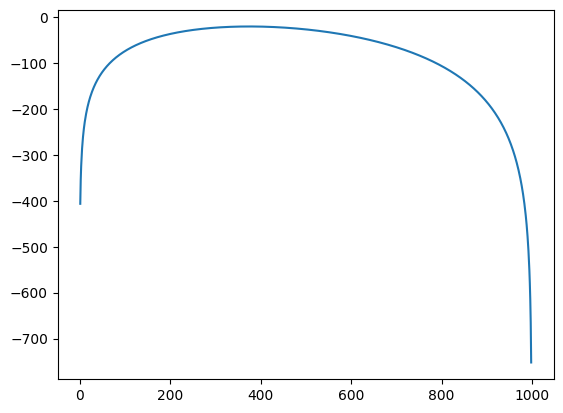

In [113]:
x = np.linspace(0, 1, num=1000)
y = vlogbinom(x)
plt.plot(y)
plt.show()

And finally, one can find now the point of maximum of the log-likelihood: namely, np. argmax (y) returns the index in array y of the maximal element:

In [116]:
ind_max = np.argmax(y)

Therefore, the value y lind_max] is the maximal value of the log-likelihood function.

However, we are interested in the argument, that is the corresponding x[ind_max]:

In [117]:
x[ind_max]

np.float64(0.37537537537537535)

that is pretty close to the initially found value. (Surely, if we divide [0, 1] on a larger number of pieces, the prediction will be better.)

The following graph has the vertical line at the found value of [ind_max], as you can see, it comes (pretty close to the maximum of the log-likelihood function.

## 3. (If you have time) Biased, unbiased, and consistent maximum likelihood estimates

Recall that, for each sample x = (x₁, ..., xₙ) (which came from a probability distribution with an unknown parameter θ; henceforth n is fixed), we can calculate the maximum likelihood estimate θ̂ which depends, hence, on x (and x depends on θ). Since the sample x is random, we may think about the MLE θ̂ as about random variable, and calculate its expectation E(θ̂). To stress that it depends on x that depends on θ, it is often written as Eₓ|θ(θ̂).

The MLE θ̂ is called unbiased if E(θ̂) = θ, i.e. the expected value of the MLE (averaged over all possible samples x) would return the theoretical value of the estimated parameter θ.

If E(θ̂) ≠ θ, the MLE is called biased, and the difference E(θ̂) − θ characterises the level of bias.

The MLE θ̂ is called consistent if, being considered as a function of the sample size n, converges to the theoretical value of the parameter θ when n → ∞.

We have demonstrated in Task 1.3 above the consistency property of the MLE estimate for p = P(X = 1) in Bernoulli distribution. The next task demonstrates in which sense this estimate is unbiased. We know this, of course, from the theory: we proved on lectures that p̂ = k/n where k is the number of 1-s, and we know that the number of 1-s in n Bernoulli trials, with the probability p of success in each, is a binomial random variable with the expectation of np, i.e. we have E(p̂) = np/n = p.

Task 3.1
Generate m = 1000 samples, each sample of size 5, of Bernoulli random variable with p = P(X = 1) = 0.3. For each sample calculate the maximum likelihood estimate p̂ of p. Find the average of the obtained MLE.

In [181]:
import pandas as pd
from scipy.stats import bernoulli

m = 1000

will_be_mean = []

for i in range(m):


    bern_result = bernoulli.rvs(p = 0.3, size=5)
    bern_fitsie = fit(bernoulli, bern_result)
    will_be_mean.append(bern_fitsie.params[0])


np.mean(will_be_mean)


np.float64(0.29480000958756475)

Since the samples are random, your answer will be different. Notice that it’s quite close to p = 0.3.